In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline

In [2]:
import re
import ipywidgets as widgets

In [78]:
from graphviz import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>"
HTML(style)

In [79]:
def draw_graphviz(graph):
    graph = Source(graph)
    image = graph.pipe(format="svg")
    svg = SVG(image)
    svg_data = svg.data
    svg_data = re.sub(
        r'<svg xmlns=\"http://www\.w3\.org/2000/svg\" xmlns:xlink=\"http://www\.w3\.org/1999/xlink\" width=\"\d+pt\" height=\"\d+pt\"',
        '<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="100%" height="100%"',
        svg_data,
    )
    
    @widgets.interact(scale=widgets.IntSlider(min=30, max=500, step=1, value=100, description="Scale (%):", continuous_update=False))
    def _draw_svg(scale):
        return HTML('<div style="width: {width}%;">{svg}</div>'.format(width=scale, svg=svg_data))
    return _draw_svg

# graph = tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=["Died", "Survived"], filled=True)
# draw_graphviz(graph)

In [41]:
titanic_data = pd.read_csv('titanic_data/train.csv')

In [42]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [45]:
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [46]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [47]:
X.Age = X.Age.fillna(X.Age.median())

In [48]:
y = titanic_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [49]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [50]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

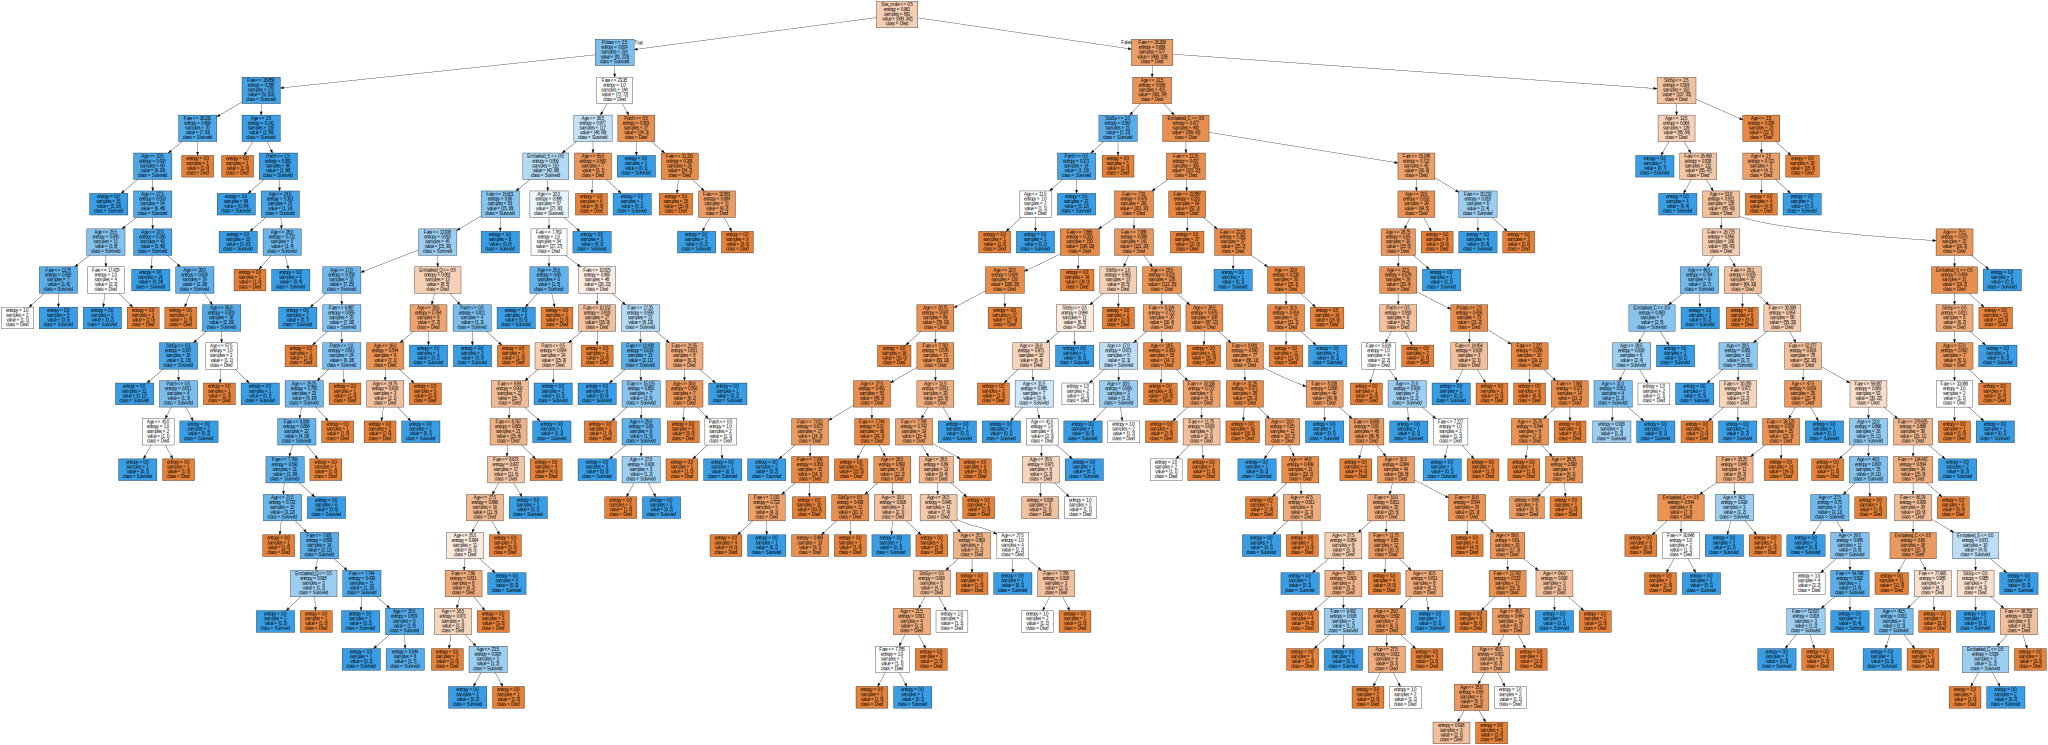

In [51]:
graph = Source(
    tree.export_graphviz(clf, 
                         out_file=None, 
                         feature_names=list(X),
                         class_names=['Died', 'Survived'], 
                         filled=True)
)
display(SVG(graph.pipe(format='svg')))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

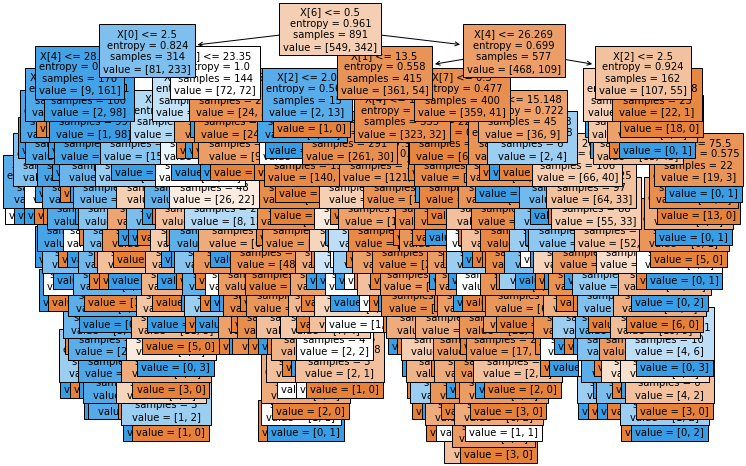

In [53]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, fontsize=10);

In [54]:
graph1 = tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=["Died", "Survived"], filled=True)
draw_graphviz(graph1)

interactive(children=(IntSlider(value=100, continuous_update=False, description='Scale (%):', max=500, min=30)…

<function __main__.draw_graphviz.<locals>._draw_svg(scale)>

## Hyperparameter tuning

In [101]:
max_depth_values = range(1, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_scores = pd.DataFrame({'max_depth': [max_depth],
                                'train_score': [train_score],
                                'test_score': [test_score],
                                'mean_cross_score': [mean_cross_val_score]})
    
    scores_data = pd.concat([scores_data, temp_scores])

In [103]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: Survived, Length: 295, dtype: int64

<AxesSubplot:xlabel='max_depth'>

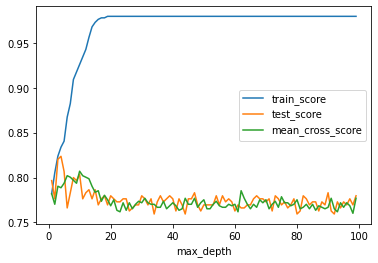

In [56]:
scores_data.plot.line(x='max_depth', y=['train_score', 'test_score', 'mean_cross_score'])

In [57]:
scores_data.head()

,max_depth,train_score,test_score,mean_cross_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.793669


<AxesSubplot:xlabel='max_depth', ylabel='score'>

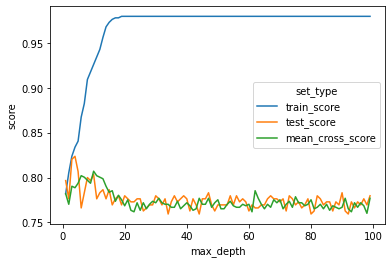

In [58]:
scores_data_long = pd.melt(frame=scores_data,
                           id_vars='max_depth',
                           value_vars=['train_score', 'test_score', 'mean_cross_score'],
                           var_name='set_type',
                           value_name='score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [59]:
scores_data_long.tail()

,max_depth,set_type,score
292,95,mean_cross_score,0.766821
293,96,mean_cross_score,0.771877
294,97,mean_cross_score,0.768501
295,98,mean_cross_score,0.760098
296,99,mean_cross_score,0.776905


In [60]:
clf = tree.DecisionTreeClassifier()
params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(1, 30)
}
gridsearch_clf = GridSearchCV(clf, params)
gridsearch_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30)})

In [61]:
gridsearch_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [62]:
gridsearch_clf.best_score_

0.8070728291316526

In [63]:
best_clf = gridsearch_clf.best_estimator_

In [64]:
best_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [65]:
best_clf.score(X_test, y_test)

0.8067796610169492

In [66]:
y_pred = best_clf.predict(X_test)
precision_score(y_test, y_pred)

0.8315789473684211

In [67]:
recall_score(y_test, y_pred)

0.6583333333333333

In [68]:
y_pred_proba = best_clf.predict_proba(X_test)

In [69]:
y_pred_proba

array([[0.55555556, 0.44444444],
       [0.75      , 0.25      ],
       [0.93913043, 0.06086957],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.93913043, 0.06086957],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.93913043, 0.06086957],
       [0.63157895, 0.36842105],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.63157895, 0.36842105],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.

<AxesSubplot:>

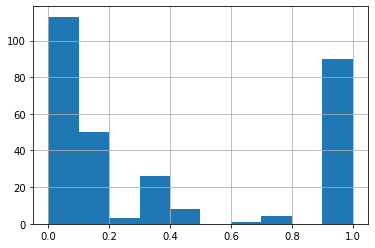

In [70]:
pd.Series(y_pred_proba[:, 1]).hist()

In [71]:
y_pred_08 = np.where(y_pred_proba[:, 1] > 0.8, 1, 0)

In [72]:
precision_score(y_test, y_pred_08)

0.8444444444444444

### ROC AUC

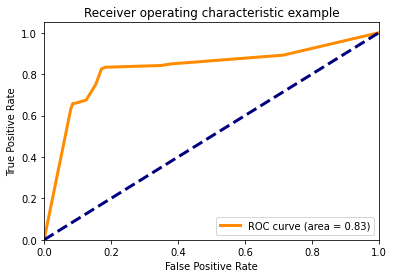

In [73]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [91]:
clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=3, 
                                  min_samples_split=100, 
                                  min_samples_leaf=10)

In [92]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

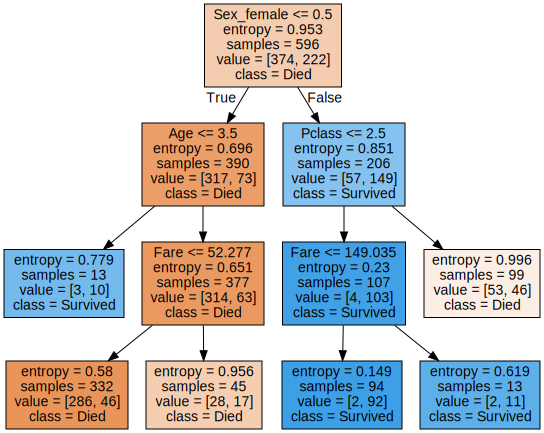

In [93]:
graph = Source(
    tree.export_graphviz(clf, 
                         out_file=None, 
                         feature_names=list(X),
                         class_names=['Died', 'Survived'], 
                         filled=True)
)
display(SVG(graph.pipe(format='svg')))

In [94]:
pred_proba = clf.predict_proba(X_test)

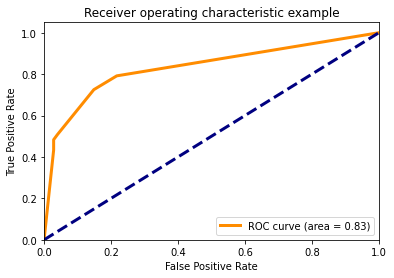

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [112]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
print('conf. matr: \n', confusion_matrix(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))

conf. matr: 
 [[137  38]
 [ 31  89]]
recall:  0.7416666666666667
precision:  0.7007874015748031


In [113]:
89/(89 + 31), 89/(89 + 38)

(0.7416666666666667, 0.7007874015748031)

In [106]:
pred_proba[:, 1]

array([0.13855422, 0.13855422, 0.13855422, 0.9787234 , 0.46464646,
       0.9787234 , 0.46464646, 0.13855422, 0.46464646, 0.9787234 ,
       0.37777778, 0.13855422, 0.46464646, 0.13855422, 0.13855422,
       0.9787234 , 0.37777778, 0.46464646, 0.13855422, 0.13855422,
       0.13855422, 0.13855422, 0.46464646, 0.13855422, 0.13855422,
       0.13855422, 0.13855422, 0.13855422, 0.13855422, 0.46464646,
       0.13855422, 0.46464646, 0.13855422, 0.46464646, 0.13855422,
       0.13855422, 0.13855422, 0.46464646, 0.9787234 , 0.13855422,
       0.37777778, 0.13855422, 0.13855422, 0.13855422, 0.46464646,
       0.13855422, 0.13855422, 0.13855422, 0.13855422, 0.37777778,
       0.46464646, 0.9787234 , 0.13855422, 0.37777778, 0.13855422,
       0.9787234 , 0.13855422, 0.84615385, 0.9787234 , 0.46464646,
       0.13855422, 0.9787234 , 0.9787234 , 0.13855422, 0.13855422,
       0.9787234 , 0.37777778, 0.13855422, 0.13855422, 0.9787234 ,
       0.9787234 , 0.84615385, 0.13855422, 0.9787234 , 0.13855